In [44]:
%load_ext autoreload
%autoreload 2

In [72]:
from utils import load_seml, model_type_map, dataset_map
import scvelo as scv
import pandas as pd
import glob
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [2]:
scv.set_figure_params()

In [3]:
save_path = '/lustre/groups/ml01/workspace/laura.martens/atac_poisson_data/processed/scib/'

# Load results

In [56]:
model_order = [model_type_map['poissonviTrue'], model_type_map['binaryviTrue'], model_type_map["peakvi"]]

In [57]:
seml_database = 'atac_to_atac'

In [58]:
results = load_seml(seml_database, convert_dataset_name=False)

  0%|          | 0/70 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

In [59]:
df1 = results[results["config.data.batch"].isna()] #filtering for final run

## Add new datasets

In [60]:
seml_database = 'atac_to_atac_new_datasets'

In [61]:
results = load_seml(seml_database, convert_dataset_name=False)

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

In [62]:
df2 = results[results["config.data.batch"].isna()] #filtering for final run

## Add benchmark results

In [63]:
benchmark = load_seml('integration_benchmark', convert_dataset_name=False)

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

## Concatenate

In [64]:
df = pd.concat([df1, df2, benchmark], axis = 0).dropna(subset='config.data.dataset')

In [66]:
df.loc[df['config.data.dataset'] == 'hematopoiesis', 'config.data.dataset'] = 'satpathy'

In [67]:
df = df[df['config.data.dataset'] != 'trapnell']

In [68]:
df.loc[df['config.data.dataset'] == 'trapnell_old', 'result.embedding'] = df.loc[df['config.data.dataset'] == 'trapnell_old', 'result.embedding'].apply(lambda x: x.mean(axis=1).to_frame())

# Compute mean per model and bring into right format for scib plotting function

In [69]:
# Export data for scib plotting in R
scib_table = pd.concat(df['result.embedding'].values, axis =1).T

In [70]:
scib_table.index = "/" + df['config.data.dataset'] + "/metrics/unscaled/full_feature/" + df['config.model.model_type'].str.split('\n').str[0] + "_embed"
scib_table.index.name = "X"

In [71]:
scib_table = scib_table.reset_index().groupby('X').agg("mean")

scib_table.head()

,NMI_cluster/label,ARI_cluster/label,ASW_label,ASW_label/batch,PCR_batch,cell_cycle_conservation,isolated_label_F1,isolated_label_silhouette,graph_conn,kBET,iLISI,cLISI,hvg_overlap,trajectory
X,,,,,,,,,,,,,,
/aerts/metrics/unscaled/full_feature/Binary VAE_embed,0.719963,0.458843,0.519397,0.952917,0.837484,NaN,0.528190,0.491352,0.947518,NaN,0.246962,0.967808,NaN,NaN
/aerts/metrics/unscaled/full_feature/PeakVI_embed,0.706722,0.438688,0.515999,0.949591,0.683178,NaN,0.560663,0.486512,0.943244,NaN,0.246131,0.967819,NaN,NaN
/aerts/metrics/unscaled/full_feature/Poisson VAE_embed,0.714754,0.446702,0.517154,0.954022,0.877684,NaN,0.532298,0.490181,0.946489,NaN,0.248961,0.966868,NaN,NaN
/aerts/metrics/unscaled/full_feature/SCALE_embed,0.552392,0.246130,0.468691,0.903891,0.000000,NaN,0.140654,0.495872,0.675981,NaN,0.218982,0.872877,NaN,NaN
/aerts/metrics/unscaled/full_feature/Signac (Harmony)_embed,0.630342,0.363472,0.466408,0.894256,0.976686,NaN,0.333330,0.454145,0.902764,NaN,0.267857,0.944966,NaN,NaN


In [101]:
scib_table.to_csv(os.path.join(save_path, "integration_metrics_benchmark_mean.csv"))

Code to produce plots using the functions from https://github.com/theislab/scib-reproducibility

```R
source("plotSingleTaskATAC.R") 
plotSingleTaskATAC('/lustre/groups/ml01/workspace/laura.martens/atac_poisson_data/processed/scib/integration_metrics_benchmark_mean.csv',
                  outdir='/lustre/groups/ml01/workspace/laura.martens/atac_poisson_data/panels/new_plots/scib/')
```

# Read in summary scores and plot them

In [73]:
sns.set_style("whitegrid")

### Read in data

In [75]:
fig_path = '/lustre/groups/ml01/workspace/laura.martens/atac_poisson_data/panels/new_plots/'

In [76]:
scores = pd.Series(glob.glob(os.path.join(fig_path, 'scib', '*.csv')))

In [77]:
scores = scores[scores.str.contains('|'.join(list(dataset_map.keys())), regex=True)]

In [78]:
scores_dfs = [pd.read_csv(score, index_col=0) for score in scores]

In [79]:
dataset = pd.Series(scores).str.split('scib/|_summary', expand=True, regex=True)[1]

In [81]:
dataset.name ='Dataset'

In [82]:
scores = pd.concat(scores_dfs, keys=dataset).reset_index()

In [83]:
scores['Dataset'] = scores['Dataset'].map(dataset_map)

### Plot data

In [84]:
order = [dataset_map[key] for key in ['neurips',  'satpathy', 'aerts', 'trapnell_old']]

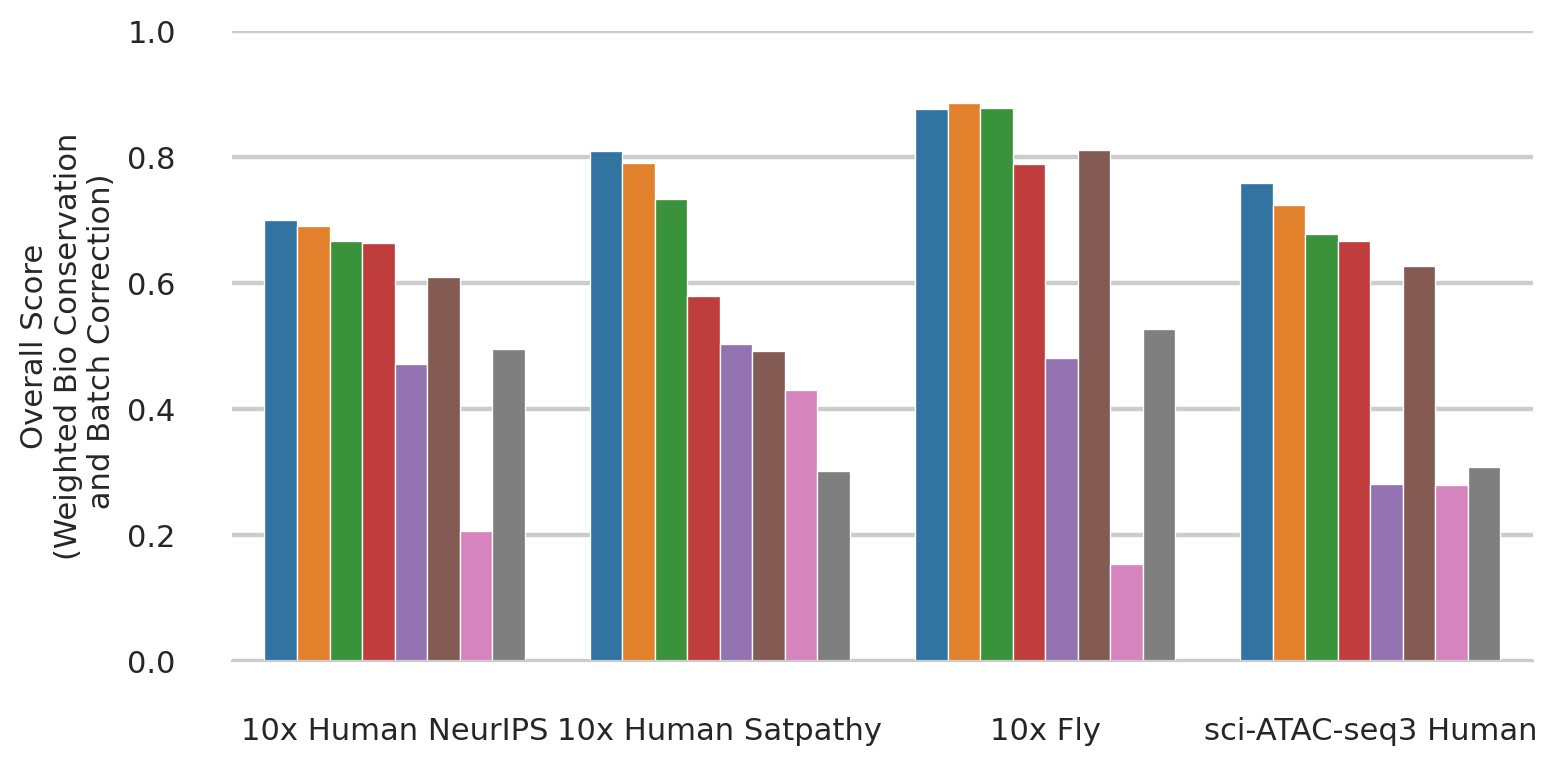

In [85]:
fig, ax = plt.subplots(figsize=(8,4))
ax = sns.barplot(data=scores, x='Dataset', y='Overall Score', hue='Method', order=order)
sns.despine(left=True)
ax.legend().remove()
plt.ylim((0,1))
plt.ylabel('Overall Score\n(Weighted Bio Conservation\n and Batch Correction)')
plt.xlabel('')
plt.tight_layout()
fig.savefig(os.path.join(fig_path, 'integration', f'overall_score_bar.pdf'))
fig.savefig(os.path.join(fig_path, 'integration', f'overall_score_bar.png'))